<a href="https://colab.research.google.com/github/Kou2004/MemoTag-assignment/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/train_data (1).csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   File Name              5 non-null      object 
 1   total_audio_duration   5 non-null      float64
 2   silence_ratio          5 non-null      float64
 3   num_silence_segments   5 non-null      int64  
 4   avg_silence_duration   5 non-null      float64
 5   max_silence_duration   5 non-null      float64
 6   R2_Pause_Dependency    5 non-null      float64
 7   pitch_variation_pause  5 non-null      float64
 8   Recall Score           5 non-null      float64
 9   Substitution Score     5 non-null      float64
 10  Speech Rate            5 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 572.0+ bytes


In [8]:
df_copy=df.drop(columns='File Name')

# Correlation Heatmap

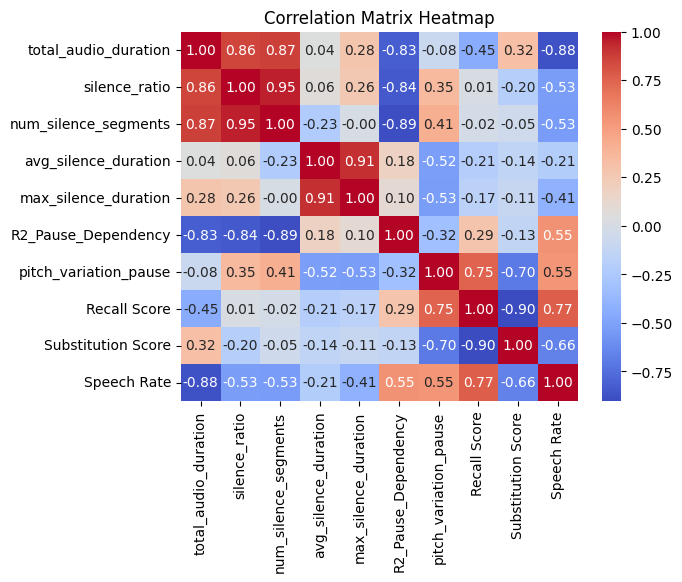

In [10]:
corr_matrix = df_copy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot of some features

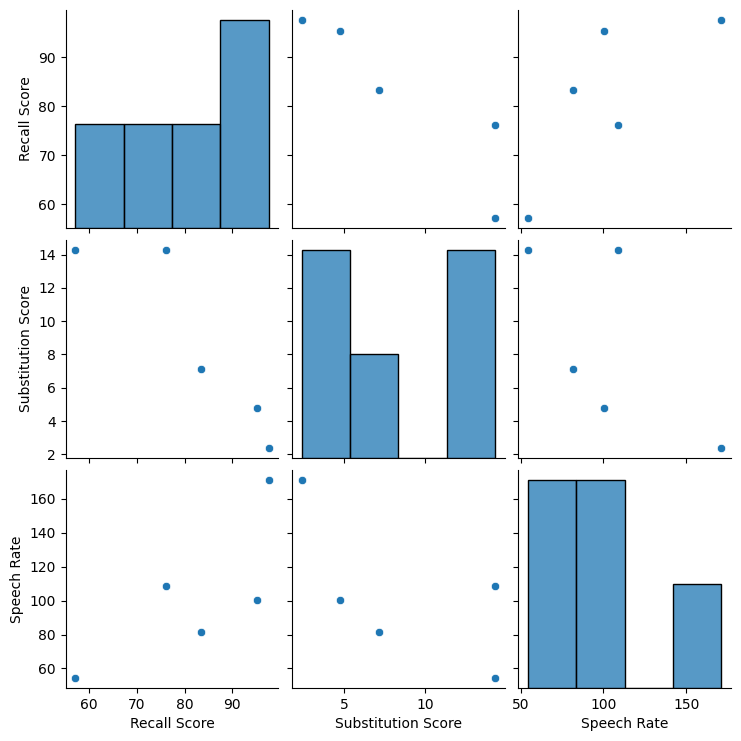

In [13]:
sns.pairplot(df_copy[['Recall Score', 'Substitution Score', 'Speech Rate']])
plt.show()

You can say here that as Recall_score increases, substitution score decreases.

Also speech rate increases with the recall score.

# Model
I am going to use the Hierchical clustering, as I don't what is the number of clusters, or number of groups.

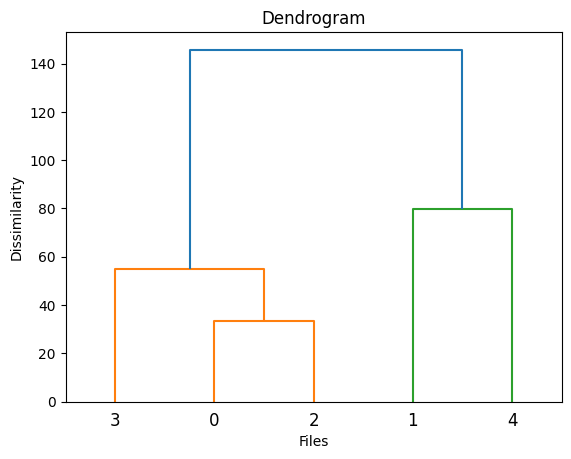

In [9]:
import scipy.cluster.hierarchy as sch

# Compute hierarchical clustering (ward linkage) on dataset
dendrogram = sch.dendrogram(sch.linkage(df_copy, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Files")
plt.ylabel("Dissimilarity")
plt.show()

From the above dendogram, we can say that file 3,0,2 are very similar to each other and file 1,4 are similar to each other. Basically there are 2 clusters.

In [15]:
from scipy.cluster.hierarchy import fcluster

# Compute the linkage matrix
linkage_matrix = sch.linkage(df_copy, method='ward')

# Cut dendrogram at 2 clusters using fcluster with 'maxclust' criterion
cluster_labels = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Add to DataFrame
df_copy['cluster'] = cluster_labels

print(df_copy[['cluster']])

   cluster
0        1
1        2
2        1
3        1
4        2


In [17]:
from tabulate import tabulate

grouped = df_copy.groupby('cluster').mean().round(2)
print(tabulate(grouped, headers='keys', tablefmt='fancy_grid'))

╒═══════════╤════════════════════════╤═════════════════╤════════════════════════╤════════════════════════╤════════════════════════╤═══════════════════════╤═════════════════════════╤════════════════╤══════════════════════╤═══════════════╕
│   cluster │   total_audio_duration │   silence_ratio │   num_silence_segments │   avg_silence_duration │   max_silence_duration │   R2_Pause_Dependency │   pitch_variation_pause │   Recall Score │   Substitution Score │   Speech Rate │
╞═══════════╪════════════════════════╪═════════════════╪════════════════════════╪════════════════════════╪════════════════════════╪═══════════════════════╪═════════════════════════╪════════════════╪══════════════════════╪═══════════════╡
│         1 │                  27.5  │            0.27 │                    5   │                   1.5  │                   2.2  │                  0.64 │                  881.67 │          72.22 │                11.91 │         81.59 │
├───────────┼────────────────────────┼──────────

We can say from the above table, that cluster 2 are much better than cluster 1 in terms of ***recall_score, word_substitution,speech_rate***. **The patients can be file 0,2,3.**